**Download Library**

In [ ]:
import nltk
nltk.download()

NLTK Downloader
---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> d

Download which package (l=list; x=cancel)?
  Identifier> all


       | 
       | Downloading package abc to /root/nltk_data...
       |   Unzipping corpora/abc.zip.
       | Downloading package alpino to /root/nltk_data...
       |   Unzipping corpora/alpino.zip.
       | Downloading package averaged_perceptron_tagger to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger.zip.
       | Downloading package averaged_perceptron_tagger_ru to
       |     /root/nltk_data...
       |   Unzipping taggers/averaged_perceptron_tagger_ru.zip.
       | Downloading package basque_grammars to /root/nltk_data...
       |   Unzipping grammars/basque_grammars.zip.
       | Downloading package biocreative_ppi to /root/nltk_data...
       |   Unzipping corpora/biocreative_ppi.zip.
       | Downloading package bllip_wsj_no_aux to /root/nltk_data...
       |   Unzipping models/bllip_wsj_no_aux.zip.
       | Downloading package book_grammars to /root/nltk_data...
       |   Unzipping grammars/book_grammars.zip.
       | Downloading 


---------------------------------------------------------------------------
    d) Download   l) List    u) Update   c) Config   h) Help   q) Quit
---------------------------------------------------------------------------
Downloader> q


True

In [ ]:
import re
import string
import numpy as np
import pandas as pd
import seaborn as sns
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [ ]:
from string import punctuation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk.stem
from nltk.stem import LancasterStemmer
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

**Download the data**

In [ ]:
! pip install kaggle
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
mkdir: cannot create directory ‘/root/.kaggle’: File exists


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = '/content/'
!kaggle datasets download -d kazanova/sentiment140 # dataset API Command
!unzip sentiment140.zip

 78% 63.0M/80.9M [00:00<00:00, 333MB/s]
100% 80.9M/80.9M [00:00<00:00, 333MB/s]
Archive:  sentiment140.zip
  inflating: training.1600000.processed.noemoticon.csv  


In [ ]:
df = pd.read_csv("/content/training.1600000.processed.noemoticon.csv", encoding="ISO-8859-1", names = ['sentiment','ids','date','flag','user','text'])

In [ ]:
df.head(2)


,sentiment,ids,date,flag,user,text
0,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...


**EDA**

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600000 entries, 0 to 1599999
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   sentiment  1600000 non-null  int64 
 1   ids        1600000 non-null  int64 
 2   date       1600000 non-null  object
 3   flag       1600000 non-null  object
 4   user       1600000 non-null  object
 5   text       1600000 non-null  object
dtypes: int64(2), object(4)
memory usage: 73.2+ MB


In [ ]:
np.sum(df.isnull())

sentiment    0
ids          0
date         0
flag         0
user         0
text         0
dtype: int64

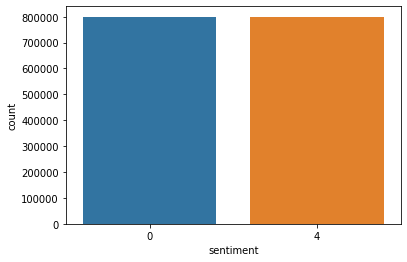

In [ ]:
sns.countplot(x='sentiment',data=df)

In [ ]:
data = df[['sentiment','text']]
data.head()

,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."


**Replacing the values from 4 to 1**

In [ ]:
data['sentiment'] = df['sentiment'].replace(4,1)
data

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


,sentiment,text
0,0,"@switchfoot http://twitpic.com/2y1zl - Awww, t..."
1,0,is upset that he can't update his Facebook by ...
2,0,@Kenichan I dived many times for the ball. Man...
3,0,my whole body feels itchy and like its on fire
4,0,"@nationwideclass no, it's not behaving at all...."
...,...,...
1599995,1,Just woke up. Having no school is the best fee...
1599996,1,TheWDB.com - Very cool to hear old Walt interv...
1599997,1,Are you ready for your MoJo Makeover? Ask me f...
1599998,1,Happy 38th Birthday to my boo of alll time!!! ...


**Creating text and sentiment list**

In [ ]:
text = list(data['text'])
sentiment = list(data['sentiment'])

In [ ]:
text[0:10]

["@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer.  You shoulda got David Carr of Third Day to do it. ;D",
 "is upset that he can't update his Facebook by texting it... and might cry as a result  School today also. Blah!",
 '@Kenichan I dived many times for the ball. Managed to save 50%  The rest go out of bounds',
 'my whole body feels itchy and like its on fire ',
 "@nationwideclass no, it's not behaving at all. i'm mad. why am i here? because I can't see you all over there. ",
 '@Kwesidei not the whole crew ',
 'Need a hug ',
 "@LOLTrish hey  long time no see! Yes.. Rains a bit ,only a bit  LOL , I'm fine thanks , how's you ?",
 "@Tatiana_K nope they didn't have it ",
 '@twittera que me muera ? ']

In [ ]:
sentiment[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [ ]:
data_pos=data[data['sentiment']==1]
data_neg=data[data['sentiment']==0]

**Word-Cloud:negative tweets**

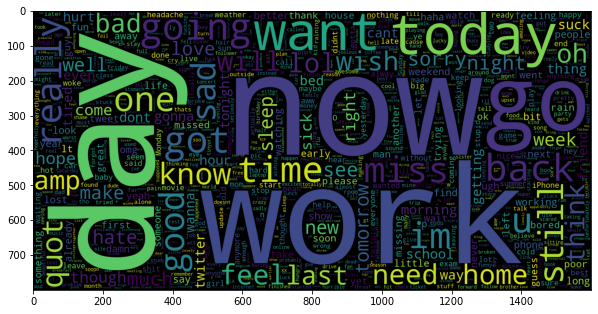

In [ ]:
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg['text']))
plt.imshow(wc)


**Word-Cloud:positive tweets**

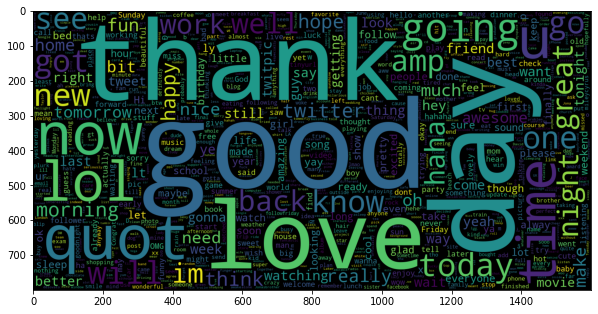

In [ ]:
plt.figure(figsize = (10,10))
wc = WordCloud(max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_pos['text']))
plt.imshow(wc)

**Preprocossing**

In [ ]:
emojis = {':)': 'smile', ':-)': 'smile', ';d': 'wink', ':-E': 'vampire', ':(': 'sad', 
          ':-(': 'sad', ':-<': 'sad', ':P': 'raspberry', ':O': 'surprised',
          ':-@': 'shocked', ':@': 'shocked',':-$': 'confused', ':\\': 'annoyed', 
          ':#': 'mute', ':X': 'mute', ':^)': 'smile', ':-&': 'confused', '$_$': 'greedy',
          '@@': 'eyeroll', ':-!': 'confused', ':-D': 'smile', ':-0': 'yell', 'O.o': 'confused',
          '<(-_-)>': 'robot', 'd[-_-]b': 'dj', ":'-)": 'sadsmile', ';)': 'wink', 
          ';-)': 'wink', 'O:-)': 'angel','O*-)': 'angel','(:-D': 'gossip', '=^.^=': 'cat'}

In [ ]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from', 
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're',
             's', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those', 
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [ ]:
def preprocess(textdata):
    processedText = []
    
    #creating a Lemmatizer
    wordLemma = WordNetLemmatizer() #define the imported library
    
    # Defining regular expression pattern we can find. in tweets
    Pattern_url        = r"((http://)[^ ]*|(https://)[^ ]*|( www\.)[^ ]*)" # e.g https://google.com
    Pattern_user       = '@[^\s]+' # e.g @Mihir check this out
    Pattern_alpha      = "[^a-zA-Z0-9]"
    Pattern_sequence   = r"(.)\1\1+"  # e.g Heyyyyyyy, I am back!
    Pattern_seqReplace = r"\1\1" # e.g Replace Heyyyyyyy with Heyy
    
    
    for tweet in textdata:
        tweet = tweet.lower() #lower casing all the text
        
        
        # Replace all URls with 'URL'
        tweet = re.sub(Pattern_url,' URL',tweet) #using the substitution method 
        
        # Replace all emojis.
        for emoji in emojis.keys(): #in each of the looped tweet, replace each emojis with their respective meaning
            tweet = tweet.replace(emoji, "EMOJI" + emojis[emoji])  # emojis[emoji] helps to get the value of the emoji from the dictionary
            
            
        # Replace @USERNAME to 'USER'.
        tweet = re.sub(Pattern_user,' USER', tweet)  #To hide Personal Information, we can replace all usernames with User
        
        
        # Replace all non alphabets.
        tweet = re.sub(Pattern_alpha, " ", tweet) # e.g I am *10 better!
        
        
        # Replace 3 or more consecutive letters by 2 letter.
        tweet = re.sub(Pattern_sequence, Pattern_seqReplace, tweet) # e.g Replace Heyyyyyyy with Heyy
        
        
        tweetwords = ''
        for word in tweet.split():
            if len(word) > 2 and word.isalpha():
                word = wordLemma.lemmatize(word)
                tweetwords += (word + ' ')
        
        processedText.append(tweetwords)
        
    return processedText

In [ ]:
processedtext = preprocess(text)

**Train and Test split**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report

In [98]:
x_train, x_test, y_train, y_test = train_test_split(processedtext, sentiment, test_size = 0.2, random_state = 0)

**Trf the data using TF and IDF**

In [99]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=500000)
vectoriser.fit(x_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


No. of feature_words:  500000


In [100]:
x_train = vectoriser.transform(x_train)
x_test  = vectoriser.transform(x_test)

**For Prediction Accuracy**

In [101]:
def print_report(y_pred):
  print(classification_report(y_test, y_pred))

In [102]:
def conf_matrix(y_pred):
      cf_matrix = confusion_matrix(y_test, y_pred)
      categories  = ['Negative','Positive']
      group_names = ['True Neg','False Pos', 'False Neg','True Pos']
      group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
      labels = [f'{v1}\n{v2}' for v1, v2 in zip(group_names,group_percentages)]
      labels = np.asarray(labels).reshape(2,2)
      sns.heatmap(cf_matrix, annot = labels, cmap = 'Blues',fmt = '',
                      xticklabels = categories, yticklabels = categories)
      plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
      plt.ylabel("Actual values"   , fontdict = {'size':14}, labelpad = 10)
      plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)

Following are the classifiers used 
1. Random Forest Classifier
2. Logistic Regression 
3. Naive Bayes
4. xgboost
5. SVM

              precision    recall  f1-score   support

           0       0.75      0.75      0.75    159815
           1       0.75      0.76      0.75    160185

    accuracy                           0.75    320000
   macro avg       0.75      0.75      0.75    320000
weighted avg       0.75      0.75      0.75    320000



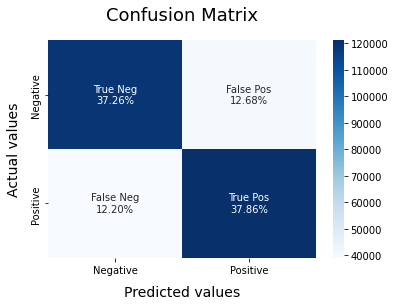

In [103]:
# Random Forest Classifier
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=200, max_depth=15)
rf_model.fit(x_train, y_train)
y_pred_rf_model = rf_model.predict(x_test)
print_report(y_pred_rf_model)
conf_matrix(y_pred_rf_model)


              precision    recall  f1-score   support

           0       0.82      0.81      0.82    159815
           1       0.81      0.83      0.82    160185

    accuracy                           0.82    320000
   macro avg       0.82      0.82      0.82    320000
weighted avg       0.82      0.82      0.82    320000



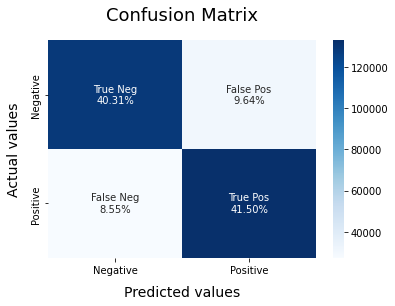

In [104]:
#Logistic Regression 
from sklearn.linear_model import LogisticRegression
LR_model = LogisticRegression(C = 2, max_iter = 1000, n_jobs=-1)
LR_model.fit(x_train, y_train)
y_pred_LR_model = LR_model.predict(x_test)
print_report(y_pred_LR_model)
conf_matrix(y_pred_LR_model)

              precision    recall  f1-score   support

           0       0.80      0.79      0.80    159815
           1       0.80      0.81      0.80    160185

    accuracy                           0.80    320000
   macro avg       0.80      0.80      0.80    320000
weighted avg       0.80      0.80      0.80    320000



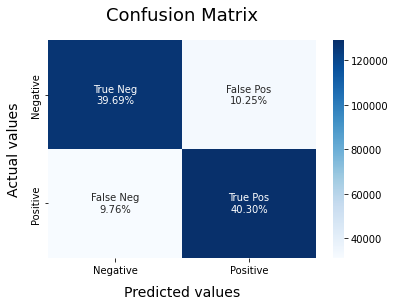

In [106]:
# Naive Bayes
from sklearn.naive_bayes import BernoulliNB
BNBmodel = BernoulliNB()
BNBmodel.fit(x_train, y_train)
y_pred_BNB_model = BNBmodel.predict(x_test)
print_report(y_pred_BNB_model)
conf_matrix(y_pred_BNB_model)


              precision    recall  f1-score   support

           0       0.69      0.72      0.70    159815
           1       0.71      0.67      0.69    160185

    accuracy                           0.70    320000
   macro avg       0.70      0.70      0.70    320000
weighted avg       0.70      0.70      0.70    320000



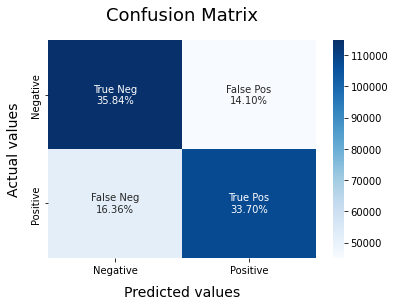

In [107]:
# xgboost
import xgboost as xgb
xgb_cl = xgb.XGBClassifier()
xgb_cl.fit(x_train, y_train)
y_pred_XGB_model = xgb_cl.predict(x_test)
print_report(y_pred_XGB_model)
conf_matrix(y_pred_XGB_model)


              precision    recall  f1-score   support

           0       0.81      0.80      0.80    159815
           1       0.80      0.82      0.81    160185

    accuracy                           0.81    320000
   macro avg       0.81      0.81      0.81    320000
weighted avg       0.81      0.81      0.81    320000



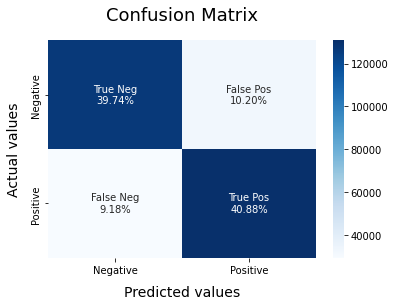

In [108]:
# SVM
from sklearn.svm import LinearSVC
SVCmodel = LinearSVC()
SVCmodel.fit(x_train, y_train)
y_pred_SVG_model = SVCmodel.predict(x_test)
print_report(y_pred_SVG_model)
conf_matrix(y_pred_SVG_model)

**Conclusion** 

*Models have following accuracy* 

1. Random Forest Classifier: 75% 
2. Logistic Regression: 82%
3. Naive Bayes: 80%
4. xgboost: 70%
5. SVM:81%

**Looking at the accuracy the best model is: Logistic Regression**